# Part-I: GDP Analysis of Indian States

## Part I-A: Analyse and compare the GDPs of various Indian states (both total and per capita). The GDP of a state is referred to as the GSDP (Gross State Domestic Product).

### For the analysis Data I-A is used.
#### This dataset contains the GSDP (Gross State Domestic Product) data for the states and union territories.

### Note: File directory : E:\Upgrad\C3 M6 GDP analysis

In [1]:
# Changing of the directory where all the file is present
import os
os.chdir(r'E:\Upgrad\C3 M6 GDP analysis')

In [2]:
# Importing of essential libraries in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid') # set style for better visualization

In [3]:
#Read data from file 
gdpsv=pd.read_csv('Data 1-A.csv')    # (gdpsv stands for Gross Domestic Product state-wise)

gdpsv.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


### Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17:

In [4]:
# Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17

gdpsv=gdpsv[~(gdpsv['Duration']=='2016-17')]
gdpsv.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


### Modification Of data for better usage and better understanding ....

In [5]:
# Combine columns 'Items  Description' & 'Duration' as 'Description for year' 

gdpsv['Description for year']=gdpsv['Items  Description']+' '+gdpsv['Duration']

# Now removal of 'Items  Description' & 'Duration' columns
gdpsv=gdpsv.drop(['Items  Description','Duration'],axis=1)  


gdpsv.set_index('Description for year',inplace=True)
gdpsv.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
Description for year,,,,,,,,,,,,,,,,,,,,,
GSDP - CURRENT PRICES (` in Crore) 2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,78254.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
GSDP - CURRENT PRICES (` in Crore) 2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,87105.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
GSDP - CURRENT PRICES (` in Crore) 2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,95893.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
GSDP - CURRENT PRICES (` in Crore) 2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,100404.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
GSDP - CURRENT PRICES (` in Crore) 2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


##### For making data table more easily readable transpose of original table is done :

In [6]:
# Now take Transpose of data frame
gdpsv=pd.DataFrame.transpose(gdpsv)
gdpsv.head()

Description for year,GSDP - CURRENT PRICES (` in Crore) 2011-12,GSDP - CURRENT PRICES (` in Crore) 2012-13,GSDP - CURRENT PRICES (` in Crore) 2013-14,GSDP - CURRENT PRICES (` in Crore) 2014-15,GSDP - CURRENT PRICES (` in Crore) 2015-16,(% Growth over previous year) 2012-13,(% Growth over previous year) 2013-14,(% Growth over previous year) 2014-15,(% Growth over previous year) 2015-16
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.43,12.85,13.40,15.85
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,13.41,16.38,14.79,12.07
Assam,143175.0,156864.0,177745.0,198098.0,224234.0,9.56,13.31,11.45,13.19
Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,14.25,12.30,17.92,10.59
Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,12.30,16.44,13.69,10.98


In [7]:
# Checking of the columns having Null values :
gdpsv.isnull().sum()

Description for year
GSDP - CURRENT PRICES (` in Crore) 2011-12     1
GSDP - CURRENT PRICES (` in Crore) 2012-13     1
GSDP - CURRENT PRICES (` in Crore) 2013-14     1
GSDP - CURRENT PRICES (` in Crore) 2014-15     1
GSDP - CURRENT PRICES (` in Crore) 2015-16    10
(% Growth over previous year) 2012-13          1
(% Growth over previous year) 2013-14          1
(% Growth over previous year) 2014-15          1
(% Growth over previous year) 2015-16         10
dtype: int64

In [8]:
# Checking of the rows having Null values :
gdpsv.isnull().sum(axis=1)

Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             2
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  2
Manipur                      2
Meghalaya                    0
Mizoram                      2
Nagaland                     2
Odisha                       0
Punjab                       2
Rajasthan                    2
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      2
Uttar Pradesh                0
Uttarakhand                  0
West Bengal1                 9
Andaman & Nicobar Islands    2
Chandigarh                   0
Delhi                        0
Puducher

#### As some of the states having Nan values are not be predicted by either of mathematical means (mean, median, sum etc.), but insight is (excluding West Bengal) all the Nan values are present for the year 2015-16 and for both the required analysis :

1. For Calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16 
###### Note: Also there is mean of computing average growth by skipping these values as % Growth for 1 year makes a lot difference.


2. For Comparing the total GDP of the states for the year 2015-16.

Data for 2015-16 is required. Therefore all the states having Null values are being drop...

States which are drop:
-  Himachal Pradesh
-  Maharashtra              
-  Manipur
-  Mizoram             
-  Nagaland
-  Punjab       
-  Rajasthan
-  Tripura
-  West Bengal1    
-  Andaman & Nicobar Islands


In [9]:
# Removal of rows containing NaN values...

gdpsv=gdpsv.drop(['Himachal Pradesh','Maharashtra','Manipur','Mizoram','Nagaland','Punjab','Rajasthan','Tripura','Andaman & Nicobar Islands','West Bengal1'],axis=0)

# Rechecking for any Nan values...
gdpsv.isnull().sum(axis=1)

Andhra Pradesh       0
Arunachal Pradesh    0
Assam                0
Bihar                0
Chhattisgarh         0
Goa                  0
Gujarat              0
Haryana              0
Jammu & Kashmir      0
Jharkhand            0
Karnataka            0
Kerala               0
Madhya Pradesh       0
Meghalaya            0
Odisha               0
Sikkim               0
Tamil Nadu           0
Telangana            0
Uttar Pradesh        0
Uttarakhand          0
Chandigarh           0
Delhi                0
Puducherry           0
All_India GDP        0
dtype: int64

### Compute the average growth rate of states (2013-16):

In [10]:
# The average growth of states over the duration 2013-14, 2014-15 and 2015-16

gdpsv['Average growth though 2013-16']=gdpsv.loc[:,'(% Growth over previous year) 2013-14':].mean(axis=1)
gdpsv.head()

Description for year,GSDP - CURRENT PRICES (` in Crore) 2011-12,GSDP - CURRENT PRICES (` in Crore) 2012-13,GSDP - CURRENT PRICES (` in Crore) 2013-14,GSDP - CURRENT PRICES (` in Crore) 2014-15,GSDP - CURRENT PRICES (` in Crore) 2015-16,(% Growth over previous year) 2012-13,(% Growth over previous year) 2013-14,(% Growth over previous year) 2014-15,(% Growth over previous year) 2015-16,Average growth though 2013-16
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.43,12.85,13.40,15.85,14.033333
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,13.41,16.38,14.79,12.07,14.413333
Assam,143175.0,156864.0,177745.0,198098.0,224234.0,9.56,13.31,11.45,13.19,12.650000
Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,14.25,12.30,17.92,10.59,13.603333
Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,12.30,16.44,13.69,10.98,13.703333


In [11]:
# Sort the table to decreasing order with respect to 'Average growth though 2013-16'

gdpsv.sort_values(by='Average growth though 2013-16',ascending=False,inplace=True)
gdpsv.head()

Description for year,GSDP - CURRENT PRICES (` in Crore) 2011-12,GSDP - CURRENT PRICES (` in Crore) 2012-13,GSDP - CURRENT PRICES (` in Crore) 2013-14,GSDP - CURRENT PRICES (` in Crore) 2014-15,GSDP - CURRENT PRICES (` in Crore) 2015-16,(% Growth over previous year) 2012-13,(% Growth over previous year) 2013-14,(% Growth over previous year) 2014-15,(% Growth over previous year) 2015-16,Average growth though 2013-16
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,13.41,16.38,14.79,12.07,14.413333
Karnataka,603778.0,691700.0,817886.0,921788.0,1027068.0,14.56,18.24,12.70,11.42,14.120000
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.43,12.85,13.40,15.85,14.033333
Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,12.30,16.44,13.69,10.98,13.703333
Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,14.25,12.30,17.92,10.59,13.603333


### Compare the Calculated Average growth for various states using a bar graph...

Text(16, 14.5, 'y-limit = (5,16)')

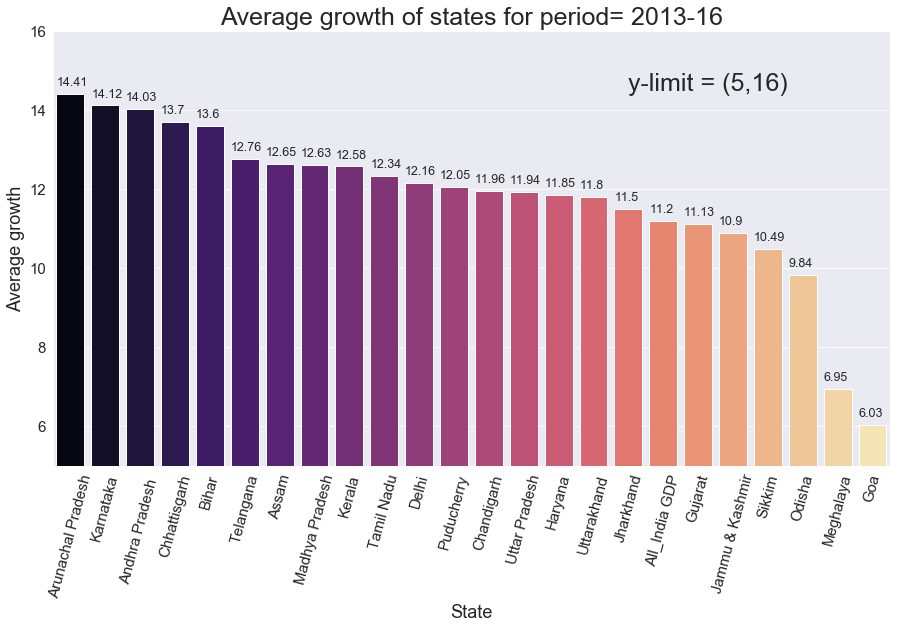

In [12]:
# Plot the comparison of average growth of all states: 

plt.figure(figsize=(15,8))  # Set Figure size
sns.barplot(x=gdpsv.index,y='Average growth though 2013-16',data=gdpsv,palette="magma")

# Adding labels on above of the bar graph

p=range(1,len(gdpsv.index)+1)
bars=round(gdpsv.loc[:,'Average growth though 2013-16'],2)

for i in range(len(p)):
    plt.text(x =p[i]-1.4 , y = bars[i]+0.2, s =bars[i], size = 12.5)


plt.xticks(rotation=75,fontsize=15,label='State')    # Rotate x-axis tick (state name by 75 deg.) and set appropriate format
plt.yticks(fontsize=15)                              # Set y ticks format
plt.ylabel('Average growth',fontsize=18)             # Set y-label and its format
plt.xlabel('State',fontsize=18)                      # Set x-label and its format
plt.title('Average growth of states for period= 2013-16',fontsize=25)   # Set Title and its format
plt.ylim(5,16)                                       # Set y limit from 5 to 16
plt.text(x=16,y=14.5,s='y-limit = (5,16)',fontsize=25) # Add additional information




# Through the graph following answers can be computed as :-

### Which states have been growing consistently fast, and which ones have been struggling?
 -  Consistently fast   -->  Arunachal Pradesh
 -  Most Struggling one -->  Goa

### Curiosity exercise - what has been the average growth rate of your home state, and how does it compare to the national average over this duration?
--> Home State - Punjab
###### Note:  Punjab Data is being discarded due to incomplete...

## Plot the total GDP of the states for the year 2015-16

In [13]:
# Data preparation for analysis...

# Sorting all the data in decresing order as repect to GSDP prices for 2015-16
gdpsv.sort_values(by='GSDP - CURRENT PRICES (` in Crore) 2015-16',ascending=False,inplace=True)

# Inclusion All_india GDP due to its very high value...
gdpsv.drop('All_India GDP',axis=0,inplace=True)

gdpsv.head()

Description for year,GSDP - CURRENT PRICES (` in Crore) 2011-12,GSDP - CURRENT PRICES (` in Crore) 2012-13,GSDP - CURRENT PRICES (` in Crore) 2013-14,GSDP - CURRENT PRICES (` in Crore) 2014-15,GSDP - CURRENT PRICES (` in Crore) 2015-16,(% Growth over previous year) 2012-13,(% Growth over previous year) 2013-14,(% Growth over previous year) 2014-15,(% Growth over previous year) 2015-16,Average growth though 2013-16
Tamil Nadu,751485.0,855481.0,971090.0,1092564.0,1212668.0,13.84,13.51,12.51,10.99,12.336667
Uttar Pradesh,724049.0,822903.0,944146.0,1043371.0,1153795.0,13.65,14.73,10.51,10.58,11.940000
Karnataka,603778.0,691700.0,817886.0,921788.0,1027068.0,14.56,18.24,12.70,11.42,14.120000
Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,17.69,11.47,10.82,11.09,11.126667
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.43,12.85,13.40,15.85,14.033333


Text(0.5, 1.0, 'Total GDP for year 2015-16')

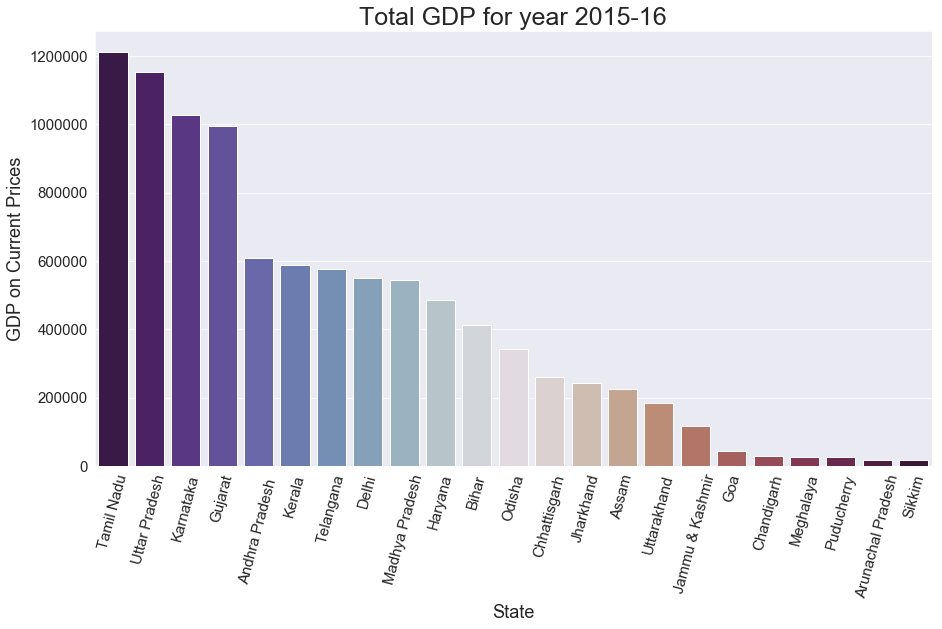

In [14]:
# the total GDP of the states for the year 2015-16.

plt.figure(figsize=(15,8))

sns.barplot(x=gdpsv.index,y='GSDP - CURRENT PRICES (` in Crore) 2015-16',data=gdpsv,palette="twilight_shifted")

plt.xticks(rotation=75,fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel('GDP on Current Prices',fontsize=18)
plt.xlabel('State',fontsize=18)
plt.title('Total GDP for year 2015-16',fontsize=25)


## Identify the top-5 and the bottom-5 states based on total GDP

#### The top - 5 :  

-  Tamil Nadu
-  Uttar Pradesh
-  Karnataka
-  Gujarat
-  Andhra Pradesh

#### The Bottom - 5:

-  Chandigarh
-  Meghalaya
-  Puducherry
-  Arunachal Pradesh
-  Sikkim

## Part 1-B :

-  Analyse and compare the GDPs of various Indian states (both total and per capita). 
###### The GDP of a state is referred to as the GSDP (Gross State Domestic Product). 

-  Categorise the states into four categories based on GDP per capita and, for each of these four categories,
-  Analyse the sub-sectors which contribute most to the GDP (such as agriculture, real estate, manufacturing, etc.).

 

#### The Data available for analysis  : 
##### This dataset contains the distribution of GSDP among three sectors for all states from 2012-17 : 
-  the primary sector (agriculture)
-  the secondary sector (industry)
-  the tertiary sector (services) 
-  Population
-  Total GSVA at basic prices
-  GDP per Capita
-  along with taxes and subsidies

##### There is separate dataset for each of the states.

## Note : 
##### For the analysis below :
- We perform the analysis only for the duration : 2014-15. 
- Data is being filter out for the Union Territories (Delhi, Chandigarh, Andaman and Nicobar Islands etc.) for further analysis since they are governed directly by the centre, not state governments.
##### Note: Union territories files did'nt read  from the data as its not required.
###### Union territories :
-  Delhi
-  Chandigarh
-  Puducherry

## Reading all data files ....

In [15]:
state_name=['Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chhattisgarh','Goa','Gujarat','Haryana','Himachal Pradesh','Jharkhand','Karnataka','Kerala','Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand']

In [16]:
# Reading all csv files in a list of dataframe (dfs) ... 

dfs=[]                                          # dfs stands for data frames
for state in state_name :
    dfs.append(pd.read_csv('{}.csv'.format(state),encoding='ISO-8859-1'))

In [17]:
# Take insight of data...
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
S.No.      33 non-null object
Item       33 non-null object
2011-12    33 non-null int64
2012-13    33 non-null int64
2013-14    33 non-null int64
2014-15    33 non-null int64
2015-16    33 non-null int64
2016-17    33 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.1+ KB


## Data Preparation :

### Removal and Addition of required columns...

In [18]:
# Remove the unnecessary columns and addition of required one ...

for i in range(len(dfs)):
    dfs[i]=dfs[i].loc[:,['Item','2014-15']]
    dfs[i]['State']=state_name[i]

In [19]:
# insight if data uploaded...
dfs[0]

,Item,2014-15,State
0,"Agriculture, forestry and fishing",14819416,Andhra Pradesh
1,Crops,7893514,Andhra Pradesh
2,Livestock,4309078,Andhra Pradesh
3,Forestry and logging,346160,Andhra Pradesh
4,Fishing and aquaculture,2270664,Andhra Pradesh
5,Mining and quarrying,1484300,Andhra Pradesh
6,Primary,16303716,Andhra Pradesh
7,Manufacturing,4672266,Andhra Pradesh
8,"Electricity, gas, water supply & other utility...",1151729,Andhra Pradesh
9,Construction,4664889,Andhra Pradesh


In [20]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
Item       33 non-null object
2014-15    33 non-null int64
State      33 non-null object
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


#### Preparation of dataframe having columns :-    # For better and ease of use of data

-  Primary
-  Secondary
-  Tertiary
-  Total GSVA across various sectors
-  taxes
-  Subsidies
-  GSDP
-  Population
-  Per Capita GSDP

In [21]:
# Columns name...
columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products','Gross State Domestic Product','Population (\'00)','Per Capita GSDP (Rs.)']

In [22]:
# Make a nested list to read all column data that required
data=[[] for _ in range(len(columns))]  

for r in range(len(columns)):
    for i in range(len(dfs)):
        data[r].append(int(dfs[i].loc[(dfs[i].Item==columns[r]),'2014-15']))

# Formation of Dictionary of list...
dictionary={}                   
dictionary['State']=state_name

dictionary.update(dict(zip(columns,data)))

# Conversion of Dictionary into suitable data frame required
gsdp=pd.DataFrame(dictionary)

# Following Data Frame created: 
gsdp.head()

,State,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,Andhra Pradesh,16303716,10488884,22032942,48825542,5512100,1690800,52646842,501510,104977
1,Arunachal Pradesh,716959,287489,631844,1636292,70099,30272,1676119,14870,112718
2,Assam,5326697,4033091,9307109,18666897,1725309,582406,19809800,326780,60621
3,Bihar,8019997,5984896,22179969,36184863,3213546,2006421,37391988,1101240,33954
4,Chhattisgarh,6400817,8238886,7588778,22228481,2601791,1332092,23498180,270530,86860


In [23]:
# Information regarding new table...
gsdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
State                           27 non-null object
Primary                         27 non-null int64
Secondary                       27 non-null int64
Tertiary                        27 non-null int64
TOTAL GSVA at basic prices      27 non-null int64
Taxes on Products               27 non-null int64
Subsidies on products           27 non-null int64
Gross State Domestic Product    27 non-null int64
Population ('00)                27 non-null int64
Per Capita GSDP (Rs.)           27 non-null int64
dtypes: int64(9), object(1)
memory usage: 2.2+ KB


In [24]:
# Evaluation of any NA values data in the formed dataframe ...

gsdp.isnull().any()

State                           False
Primary                         False
Secondary                       False
Tertiary                        False
TOTAL GSVA at basic prices      False
Taxes on Products               False
Subsidies on products           False
Gross State Domestic Product    False
Population ('00)                False
Per Capita GSDP (Rs.)           False
dtype: bool

### Formed another dataframe includes Gross State Domestic product sub-sector wise in a different states (gsdp_sec) : 

#### Drop Out the rows that no required in sub-sector dataframe :

In [25]:
# Drop out the rows...
for r in range(len(columns)):
    for i in range(len(dfs)):
        dfs[i]=dfs[i][~(dfs[i].Item==columns[r])]

        
# Remove unwanted rows(rows that tell about some collective sub-sectors) from dataset (For eg. 'Agriculture, forestry and fishing')
rows=['Agriculture, forestry and fishing','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting']

for r in range(len(rows)):
    for i in range(len(dfs)):
        dfs[i]=dfs[i][~(dfs[i].Item==rows[r])]
        
# Take Out the look of modified data frame
dfs[0]

,Item,2014-15,State
1,Crops,7893514,Andhra Pradesh
2,Livestock,4309078,Andhra Pradesh
3,Forestry and logging,346160,Andhra Pradesh
4,Fishing and aquaculture,2270664,Andhra Pradesh
5,Mining and quarrying,1484300,Andhra Pradesh
7,Manufacturing,4672266,Andhra Pradesh
8,"Electricity, gas, water supply & other utility...",1151729,Andhra Pradesh
9,Construction,4664889,Andhra Pradesh
12,Trade & repair services,3716000,Andhra Pradesh
13,Hotels & restaurants,517400,Andhra Pradesh


#### Addition of new Column That needed (For eg. Sector of each category) :

##### Sectors are divided as follows:
###### Primary :
-  Crops
-  Livestock Forestry and logging
-  Fishing and aquaculture
-  Mining and quarrying 

###### Secondary :
-  Manufacturing 
-  Electricity, gas, water supply & other utility services
-  Construction

###### Tertiary :
-  Trade & repair services 
-  Hotels & restaurants
-  Railways
-  Road transport
-  Water transport
-  Air transport
-  Services incidental to transport
-  Storage
-  Communication & services related to broadcasting
-  Financial services 
-  Real estate, ownership of dwelling & professional services
-  Public administration 
-  Other services


In [26]:
# Addition a column (Name: Sectors) defining Sector of each Sub-Sector :

sectors={'Primary':['Crops','Livestock','Forestry and logging','Fishing and aquaculture','Mining and quarrying'],'Secondary':['Manufacturing','Electricity, gas, water supply & other utility services','Construction'],'Tertiary':['Trade & repair services','Hotels & restaurants','Railways','Road transport','Water transport','Air transport','Services incidental to transport','Storage','Communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services']}

def get_key(val):
    for key,value in sectors.items():
        if val in value:
            return key
    return None

for i in range(len(dfs)):
    dfs[i]['Sector']=dfs[i]['Item'].apply(get_key)
    
# Look upon new table...
dfs[0]

,Item,2014-15,State,Sector
1,Crops,7893514,Andhra Pradesh,Primary
2,Livestock,4309078,Andhra Pradesh,Primary
3,Forestry and logging,346160,Andhra Pradesh,Primary
4,Fishing and aquaculture,2270664,Andhra Pradesh,Primary
5,Mining and quarrying,1484300,Andhra Pradesh,Primary
7,Manufacturing,4672266,Andhra Pradesh,Secondary
8,"Electricity, gas, water supply & other utility...",1151729,Andhra Pradesh,Secondary
9,Construction,4664889,Andhra Pradesh,Secondary
12,Trade & repair services,3716000,Andhra Pradesh,Tertiary
13,Hotels & restaurants,517400,Andhra Pradesh,Tertiary


##### Note: As we are only doing analysis on data for 2014-15 the column present representing Gross Product value for each sectors is name as GPV...

In [27]:
# Formation of specified table and modification of the same(reorder and renaming of columns name for better understanding)

gsdp_sec=dfs[0]    # Stands for Gross state domestic product sector wise

# Merging of all dataframes
for i in range(1,len(dfs)):
    gsdp_sec=gsdp_sec.append(dfs[i],ignore_index=True)      # Use of function append for merging all dataframes

gsdp_sec.columns=['Sub-Sectors','GPV','State','Sector']    # Renaming of column

gsdp_sec=gsdp_sec[['Sub-Sectors','Sector','State','GPV']]  # Reorder of column index

# insight on formed table
gsdp_sec.head()

,Sub-Sectors,Sector,State,GPV
0,Crops,Primary,Andhra Pradesh,7893514.0
1,Livestock,Primary,Andhra Pradesh,4309078.0
2,Forestry and logging,Primary,Andhra Pradesh,346160.0
3,Fishing and aquaculture,Primary,Andhra Pradesh,2270664.0
4,Mining and quarrying,Primary,Andhra Pradesh,1484300.0


### Problem 1:  Plot the GDP per capita for all the states : 

In [28]:
# Data frame used: 
gsdp.head()

,State,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,Andhra Pradesh,16303716,10488884,22032942,48825542,5512100,1690800,52646842,501510,104977
1,Arunachal Pradesh,716959,287489,631844,1636292,70099,30272,1676119,14870,112718
2,Assam,5326697,4033091,9307109,18666897,1725309,582406,19809800,326780,60621
3,Bihar,8019997,5984896,22179969,36184863,3213546,2006421,37391988,1101240,33954
4,Chhattisgarh,6400817,8238886,7588778,22228481,2601791,1332092,23498180,270530,86860


In [29]:
# Sorting the data as per 'Per Capita GSDP(Rs.)'
gsdp.sort_values(by='Per Capita GSDP (Rs.)',ascending=False,inplace=True)

# Resetting the index to set from 0...
gsdp = gsdp.reset_index(drop=True)

# Insight to the table 
gsdp.head()

,State,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,Goa,312129,1547536,1738217,3597882,527279,61854,4063307,14950,271793
1,Sikkim,138776,845253,483103,1467133,72200,18400,1520933,6330,240274
2,Haryana,8040424,12561411,19226568,39828404,4985670,1067867,43746207,266620,164077
3,Kerala,6489442,12070040,29673778,48233259,5189352,822381,52600230,339843,154778
4,Uttarakhand,1845972,7642865,5587975,15076812,1434856,313139,16198529,105820,153076


Text(0.5, 1.0, 'GSDP per Capita (2014-15)')

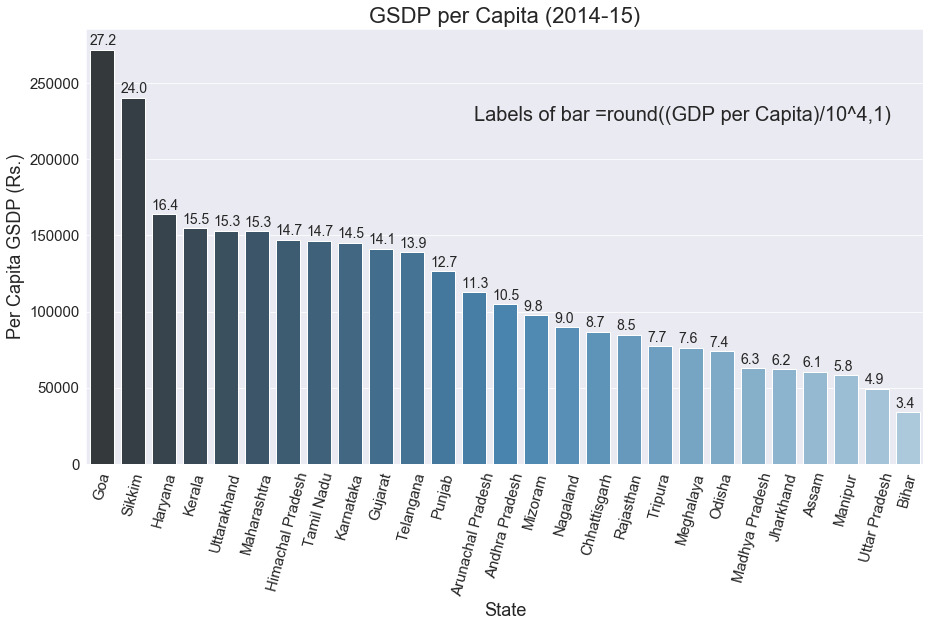

In [30]:
# Plot the graph:
plt.figure(figsize=(15,8))

a=gsdp['State']                       # Defining x-axis variable
b=gsdp['Per Capita GSDP (Rs.)']       # Defining y-axis variable
index=gsdp.index                      # Defining index

sns.barplot(x=a,y=b,palette="Blues_d")

# Addition of labels on bar: 
p=range(1,len(index)+1)
bars=b
label=round(b/10000,1)

for i in range(len(p)) :
    plt.text(x=(p[i]-1.4),y=(bars[i]+3000),s=label[i],size=14)

# Addition of extra information for ease of understanding...
plt.text(x=12,y=225000,s='Labels of bar =round((GDP per Capita)/10^4,1)',size=20)
    
plt.xticks(rotation=75,fontsize=15)        
plt.yticks(fontsize=15)
plt.ylabel('Per Capita GSDP (Rs.)',fontsize=18)
plt.xlabel('State',fontsize=18)
plt.title('GSDP per Capita (2014-15)',fontsize=22)


### Insights from the problem:

#### Identify the top-5 and the bottom-5 states based on GDP per capita (From Highest to lowest) :
- Top 5:
> Goa<br>
> Sikkim<br>
> Haryana<br>
> Kerala<br>
> Uttarakhand<br>

-  Bottom 5:
> Jharkhand<br>
> Assam<br>
> Manipur<br>
> Uttar Pradesh<br>
> Bihar<br>

#### Ratio of highest per capita GDP (Goa) to the lowest per capita GDP (Bihar) :
a(Goa GDP per capita) = 271793

b(Bihar GDP per capita) = 33954

$ a / b$ = 8.004741709371503

### Problem 2 : Plot the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GSVA for all the states :

#### Formation of required table :

In [31]:
# Look of table used:
gsdp.head()

,State,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,Goa,312129,1547536,1738217,3597882,527279,61854,4063307,14950,271793
1,Sikkim,138776,845253,483103,1467133,72200,18400,1520933,6330,240274
2,Haryana,8040424,12561411,19226568,39828404,4985670,1067867,43746207,266620,164077
3,Kerala,6489442,12070040,29673778,48233259,5189352,822381,52600230,339843,154778
4,Uttarakhand,1845972,7642865,5587975,15076812,1434856,313139,16198529,105820,153076


In [32]:
gsdp.columns

Index(['State', 'Primary', 'Secondary', 'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       'Population ('00)', 'Per Capita GSDP (Rs.)'],
      dtype='object')

In [33]:
# Make a data frame representing the contribution of various sectors in different states...

table=gsdp.loc[:,['State','Primary','Secondary','Tertiary','TOTAL GSVA at basic prices']]

# Set State as index of table
table.set_index('State',inplace=True)

table=table/(10**4)  # For ease of making plot
table.sort_values(by='TOTAL GSVA at basic prices',ascending=False,inplace=True) # Sort the table by GSVA prices 

table.head()

,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices
State,,,,
Maharashtra,2175.8383,4744.5207,8863.1076,15783.4665
Tamil Nadu,1332.9774,3284.1892,5334.3788,9951.5453
Uttar Pradesh,2599.9255,2554.8724,4596.8959,9751.6938
Karnataka,1206.6304,2048.4404,5049.0630,8304.1338
Gujarat,1588.7187,3302.3538,3022.0377,7913.1102


### Note: 
##### Due to variance of Total GDP across low GSDP and high GSDP states is very high, therfore to visualize the contribution of each sector of low GSDP states, representation is done in two graphs :

In [34]:
# Table is divided into two tables : 
table1=table.iloc[0:17,:].copy()
table2=table.iloc[17:,:].copy()

In [35]:
#Formation of new table representing the percentage contribution of each sectors to total GSDP:
# Copy of main table to avoid any changes in original one..

table_p=[[],[]]
table_p[0],table_p[1]=(table.iloc[0:17,:].copy()),(table.iloc[17:,:].copy())

# Conversion into percentage value..
for a in table_p:
    a.Primary=round((a.Primary/a['TOTAL GSVA at basic prices'])*100,2)
    a.Secondary=round((a.Secondary/a['TOTAL GSVA at basic prices'])*100,2)
    a.Tertiary=round((a.Tertiary/a['TOTAL GSVA at basic prices'])*100,2)
    
print('table_p 1:\n',table_p[0].head(),'\n')
print('table_p 2:\n',table_p[1].head(),'\n')

table_p 1:
                Primary  Secondary  Tertiary  TOTAL GSVA at basic prices
State                                                                  
Maharashtra      13.79      30.06     56.15                  15783.4665
Tamil Nadu       13.39      33.00     53.60                   9951.5453
Uttar Pradesh    26.66      26.20     47.14                   9751.6938
Karnataka        14.53      24.67     60.80                   8304.1338
Gujarat          20.08      41.73     38.19                   7913.1102 

table_p 2:
                   Primary  Secondary  Tertiary  TOTAL GSVA at basic prices
State                                                                     
Uttarakhand         12.24      50.69     37.06                   1507.6812
Himachal Pradesh    15.80      42.03     42.17                    980.0853
Goa                  8.68      43.01     48.31                    359.7882
Tripura             32.36      16.64     51.00                    291.1319
Meghalaya           

<Figure size 432x288 with 0 Axes>

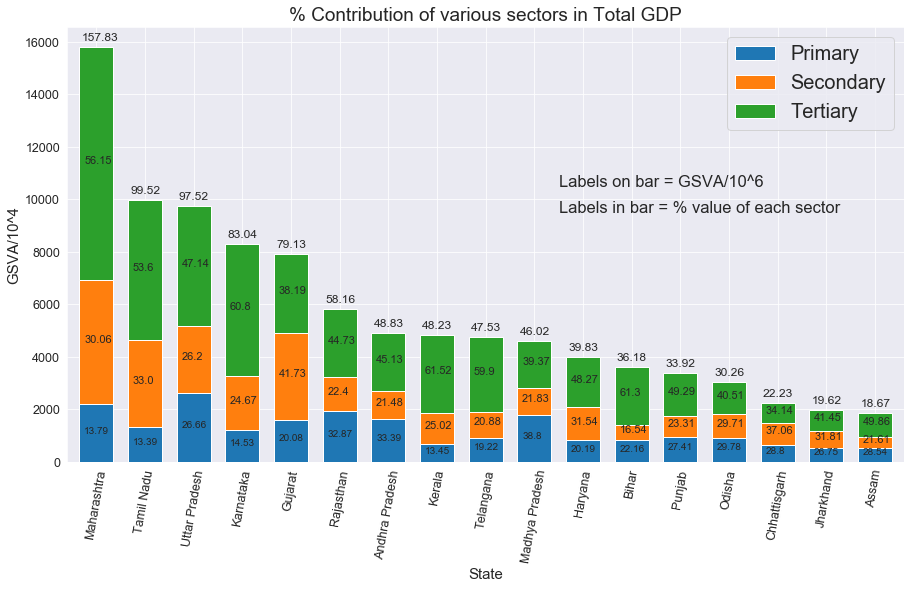

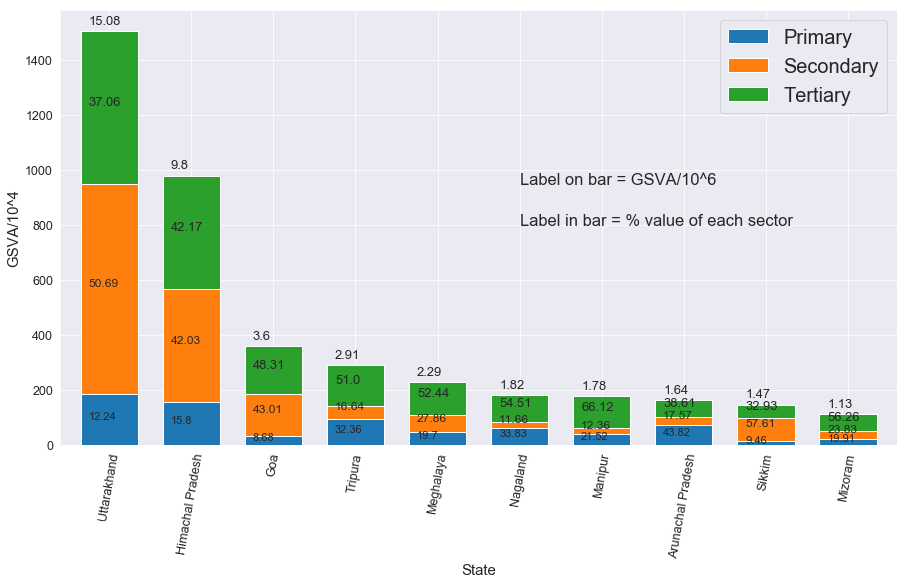

In [36]:
# Figure 1 providing insights of high GSDP states :

plt.figure(0)

b=table1['TOTAL GSVA at basic prices']

table1.drop('TOTAL GSVA at basic prices',axis=1).plot.bar(stacked=True,rot=80,width=0.7,figsize=(15,8))

p=range(1,len(table1.index)+1)
bars=b
label=round(b/100,2)

# Percentage Labels on bars :

for i in range(len(p)) :
    plt.text(x=(p[i]-1.3),y=(bars[i]+250),s=label[i],size=12)
    plt.text(x=(p[i]-1.25),y=(table1.Primary[i])/2,s=str(table_p[0].Primary[i]),size=10)
    plt.text(x=(p[i]-1.25),y=table1.Primary[i]+table1.Secondary[i]/2,s=str(table_p[0].Secondary[i]),size=11)
    plt.text(x=(p[i]-1.25),y=table1.Primary[i]+table1.Secondary[i]+table1.Tertiary[i]/2,s=str(table_p[0].Tertiary[i]),size=11)

# Required labels for good insights :
plt.text(x=9.5,y=10500,s='Labels on bar = GSVA/10^6',size=16.5)
plt.text(x=9.5,y=9500,s='Labels in bar = % value of each sector',size=16.5)

plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.ylabel('GSVA/10^4',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.legend(fontsize=20)
plt.title('% Contribution of various sectors in Total GDP',size=19)


#Figure 2 providing insights of low GSDP states :

plt.figure(1)

b=table2['TOTAL GSVA at basic prices']

table2.drop('TOTAL GSVA at basic prices',axis=1).plot.bar(stacked=True,rot=80,width=0.7,figsize=(15,8))

p=range(1,len(table2.index)+1)
bars=b
label=round(b/100,2)

# Percentage Labels on bars:

for i in range(len(p)) :
    plt.text(x=(p[i]-1.25),y=(bars[i]+25),s=label[i],size=13)
    plt.text(x=(p[i]-1.25),y=(table2.Primary[i])/2,s=str(table_p[1].Primary[i]),size=11)
    plt.text(x=(p[i]-1.25),y=10+table2.Primary[i]+table2.Secondary[i]/2,s=str(table_p[1].Secondary[i]),size=12)
    plt.text(x=(p[i]-1.25),y=7+table2.Primary[i]+table2.Secondary[i]+table2.Tertiary[i]/2,s=str(table_p[1].Tertiary[i]),size=13)

# Required labels for good insights :
plt.text(x=5,y=950,s='Label on bar = GSVA/10^6',size=16.5)
plt.text(x=5,y=800,s='Label in bar = % value of each sector',size=16.5)
    
plt.xticks(size=12.5)
plt.yticks(size=12.5)
plt.ylabel('GSVA/10^4',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.legend(fontsize=20)


plt.show()

### Categorise the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 would have the highest per capita GDP, C4 the lowest) based on the quantile values : 0.20,0.5, 0.85, 1


In [37]:
gsdp.head()

,State,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,Goa,312129,1547536,1738217,3597882,527279,61854,4063307,14950,271793
1,Sikkim,138776,845253,483103,1467133,72200,18400,1520933,6330,240274
2,Haryana,8040424,12561411,19226568,39828404,4985670,1067867,43746207,266620,164077
3,Kerala,6489442,12070040,29673778,48233259,5189352,822381,52600230,339843,154778
4,Uttarakhand,1845972,7642865,5587975,15076812,1434856,313139,16198529,105820,153076


In [38]:
# Quantile values on which categorisation will be done...
quantile_values=gsdp['Per Capita GSDP (Rs.)'].quantile([0.20,0.5, 0.85, 1])

print(quantile_values)

0.20     65187.0
0.50    104977.0
0.85    153246.2
1.00    271793.0
Name: Per Capita GSDP (Rs.), dtype: float64


In [39]:
# Categorisation of gsdp data frame as per the quantile_values...
category=[]

for v in gsdp['Per Capita GSDP (Rs.)']:
    if v>=quantile_values[0.85]:
        category.append('C1')
    elif v>=quantile_values[0.5]:
        category.append('C2')
    elif v>=quantile_values[0.2]:
        category.append('C3')
    else:
        category.append('C4')
        
gsdp['Category']=category
gsdp.head()

,State,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Category
0,Goa,312129,1547536,1738217,3597882,527279,61854,4063307,14950,271793,C1
1,Sikkim,138776,845253,483103,1467133,72200,18400,1520933,6330,240274,C1
2,Haryana,8040424,12561411,19226568,39828404,4985670,1067867,43746207,266620,164077,C1
3,Kerala,6489442,12070040,29673778,48233259,5189352,822381,52600230,339843,154778,C1
4,Uttarakhand,1845972,7642865,5587975,15076812,1434856,313139,16198529,105820,153076,C2


In [40]:
gsdp.tail()

,State,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Category
22,Jharkhand,5248354,6241471,8133341,19623166,2499171,411619,21710718,349660,62091,C4
23,Assam,5326697,4033091,9307109,18666897,1725309,582406,19809800,326780,60621,C4
24,Manipur,383140,220173,1177334,1780647,92766,69137,1804276,30873,58442,C4
25,Uttar Pradesh,25999255,25548724,45968959,97516938,10107396,3287219,104337115,2109940,49450,C4
26,Bihar,8019997,5984896,22179969,36184863,3213546,2006421,37391988,1101240,33954,C4


In [41]:
# Category aslo done on sub-sector data frame using merge method in pandas...
gsdp_sec=pd.merge(gsdp_sec,gsdp[['State','Category']],how='outer',on='State')
gsdp_sec.head()

,Sub-Sectors,Sector,State,GPV,Category
0,Crops,Primary,Andhra Pradesh,7893514.0,C2
1,Livestock,Primary,Andhra Pradesh,4309078.0,C2
2,Forestry and logging,Primary,Andhra Pradesh,346160.0,C2
3,Fishing and aquaculture,Primary,Andhra Pradesh,2270664.0,C2
4,Mining and quarrying,Primary,Andhra Pradesh,1484300.0,C2


##### Before plotting the data, Data is used to check for outliers and Nan values

In [42]:
# Checking of any NaN values in data...
gsdp_sec.isnull().sum()

Sub-Sectors     0
Sector          6
State           0
GPV            16
Category        0
dtype: int64

In [43]:
# Checking of any wrong values i/o in GDP of states (As GDP can't be -ve)...
sum(gsdp_sec.GPV<=0)

20

In [44]:
# Removal of NaN and -ve values of column GDP...

gsdp_sec=gsdp_sec[~np.isnan(gsdp_sec.GPV)]
gsdp_sec=gsdp_sec[~(gsdp_sec.GPV<=0)]

gsdp_sec.isnull().sum()

Sub-Sectors    0
Sector         6
State          0
GPV            0
Category       0
dtype: int64

In [45]:
# Checking of rows where disperancies occured...

gsdp_sec.loc[(gsdp_sec.isnull().sum(axis=1))>0,:]

,Sub-Sectors,Sector,State,GPV,Category
140,Services incidental to transport*,None,Gujarat,2744163.0,C2
239,Trade & repair services*,None,Kerala,7763847.0,C1
242,Road transport**,None,Kerala,2761427.0,C1
476,Services incidental to transport*,None,Tamil Nadu,864407.0,C2
518,Services incidental to transport*,None,Tripura,88721.0,C3
557,Road transport*,None,Uttarakhand,307147.0,C2


##### It seems like some of sector name are entered with some character, therefore there names are being change to proper names and corrresponding Sectors and category are being defined 

In [46]:
# Correction of string names:
gsdp_sec.loc[[140,476,518],:'Sub-Sectors']='Services incidental to transport'
gsdp_sec.loc[239,'Sub-Sectors']='Trade & repair services'
gsdp_sec.loc[[242,557],'Sub-Sectors']='Road transport'

# Allocation of Sector :
for i in [140,239,242,476,518,557]:
    gsdp_sec.loc[i,'Sector']=get_key(gsdp_sec.loc[i,'Sub-Sectors'])

In [47]:
# Re-checking of the data
gsdp_sec.loc[[140,239,242,476,518,557],:]

,Sub-Sectors,Sector,State,GPV,Category
140,Services incidental to transport,Tertiary,Gujarat,2744163.0,C2
239,Trade & repair services,Tertiary,Kerala,7763847.0,C1
242,Road transport,Tertiary,Kerala,2761427.0,C1
476,Services incidental to transport,Tertiary,Tamil Nadu,864407.0,C2
518,Services incidental to transport,Tertiary,Tripura,88721.0,C3
557,Road transport,Tertiary,Uttarakhand,307147.0,C2


##### States are being distributed into different data Frame based on there category :

In [48]:
category=['None']

for i in range(1,5):
    category.append(gsdp_sec.loc[gsdp_sec.loc[:,'Category']==('C'+str(i))])
    
    # Aggregation is done on basis of sub-sectors...
    category[i]=category[i].pivot_table(index='Sub-Sectors',values='GPV',aggfunc=sum)
    
    # Sorting of all dataframe based on GDP vales ...
    category[i].sort_values(by='GPV',ascending=False,inplace=True)
    
    # Formation of new column representing of % contribution of each sub-sector to the category...
    category[i]['% of total GPV']=(category[i].GPV/sum(category[i].GPV))*100
    
    # Formation of new column representing the cummulative value of column % of total GPV...
    category[i]['cum']=category[i]['% of total GPV'].cumsum()
    


###### Note:  1st element of category list is deliberatory i/o as 'None',  so that C1 will be alloted to Category list 2nd element (C[1]), so on...


### Problem 3: Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc.) [not primary, secondary and tertiary] which contribute to approx. 80% of the GSDP of each category :

In [49]:
# for Category 1:
category[1].head(7)

,GPV,% of total GPV,cum
Sub-Sectors,,,
"Real estate, ownership of dwelling & professional services",14740245.0,15.828166,15.828166
Manufacturing,13758793.0,14.774277,30.602442
Trade & repair services,12989747.0,13.948470,44.550913
Construction,11264451.0,12.095837,56.646749
Other services,8059922.0,8.654794,65.301543
Crops,7962514.0,8.550197,73.851740
Livestock,4619756.0,4.960722,78.812462


#### Top 3/4/5 Sub_sectors which contribute to approx. 80% of the GSDP of category1:
- Real estate, ownership of dwelling & professional services
- Manufacturing
- Trade & repair services
- Construction
- Other services
- Crops
- Livestock

In [50]:
# For Category 2 :
category[2].head(8)

,GPV,% of total GPV,cum
Sub-Sectors,,,
Manufacturing,113868796.0,19.758265,19.758265
"Real estate, ownership of dwelling & professional services",96526855.0,16.749130,36.507395
Trade & repair services,58968334.0,10.232057,46.739452
Crops,55443609.0,9.620454,56.359906
Construction,45318451.0,7.863559,64.223465
Other services,40469046.0,7.022101,71.245565
Financial services,38197505.0,6.627948,77.873513
Livestock,23672969.0,4.107682,81.981195


##### Top 3/4/5 Sub_sectors which contribute to approx. 80% of the GSDP of category 2:
-  Manufacturing
-  Real estate, ownership of dwelling & professional services
-  Trade & repair service
-  Crops
-  Construction
-  Other services
-  Financial services
-  Livestock

In [51]:
# For Category 3:
category[3].head(7)

,GPV,% of total GPV,cum
Sub-Sectors,,,
Manufacturing,17366065.0,14.618162,14.618162
Crops,15782803.0,13.285426,27.903588
Trade & repair services,12237349.0,10.300984,38.204572
"Real estate, ownership of dwelling & professional services",11818709.0,9.948587,48.153159
Construction,11043032.0,9.295648,57.448807
Mining and quarrying,9351471.0,7.871750,65.320557
Other services,8600028.0,7.239211,72.559768


##### Top 3/4/5 Sub_sectors which contribute to approx. 80% of the GSDP of category 3:
- Manufacturing
- Crops
- Trade & repair services
- Real estate, ownership of dwelling & professional services
- Construction
- Mining and quarrying
- Other services

In [52]:
# For Category 4: 
category[4].head(8)

,GPV,% of total GPV,cum
Sub-Sectors,,,
Crops,39331055.0,17.894933,17.894933
Trade & repair services,25581239.0,11.639011,29.533944
Manufacturing,24987032.0,11.368657,40.902601
"Real estate, ownership of dwelling & professional services",24177534.0,11.000350,51.902950
Construction,22775948.0,10.362653,62.265603
Other services,15859015.0,7.215571,69.481174
Public administration,13486630.0,6.136178,75.617352
Livestock,11901405.0,5.414928,81.032280


##### Top 3/4/5 Sub_sectors which contribute to approx. 80% of the GSDP of category 4:
- Crops
- Trade & repair services
- Manufacturing
- Real estate, ownership of dwelling & professional services
- Construction
- Other services
- Public administration
- Livestock


### Problem 4: Plot the contribution of the sub-sectors as a percentage of the GSDP of each category   

##### Plot is divided into four parts based on each category representing the % contribution of each sub-sectors to the category 

Text(3, 15, '% Contribution of sub-sectors in GSDP for Category 4 states')

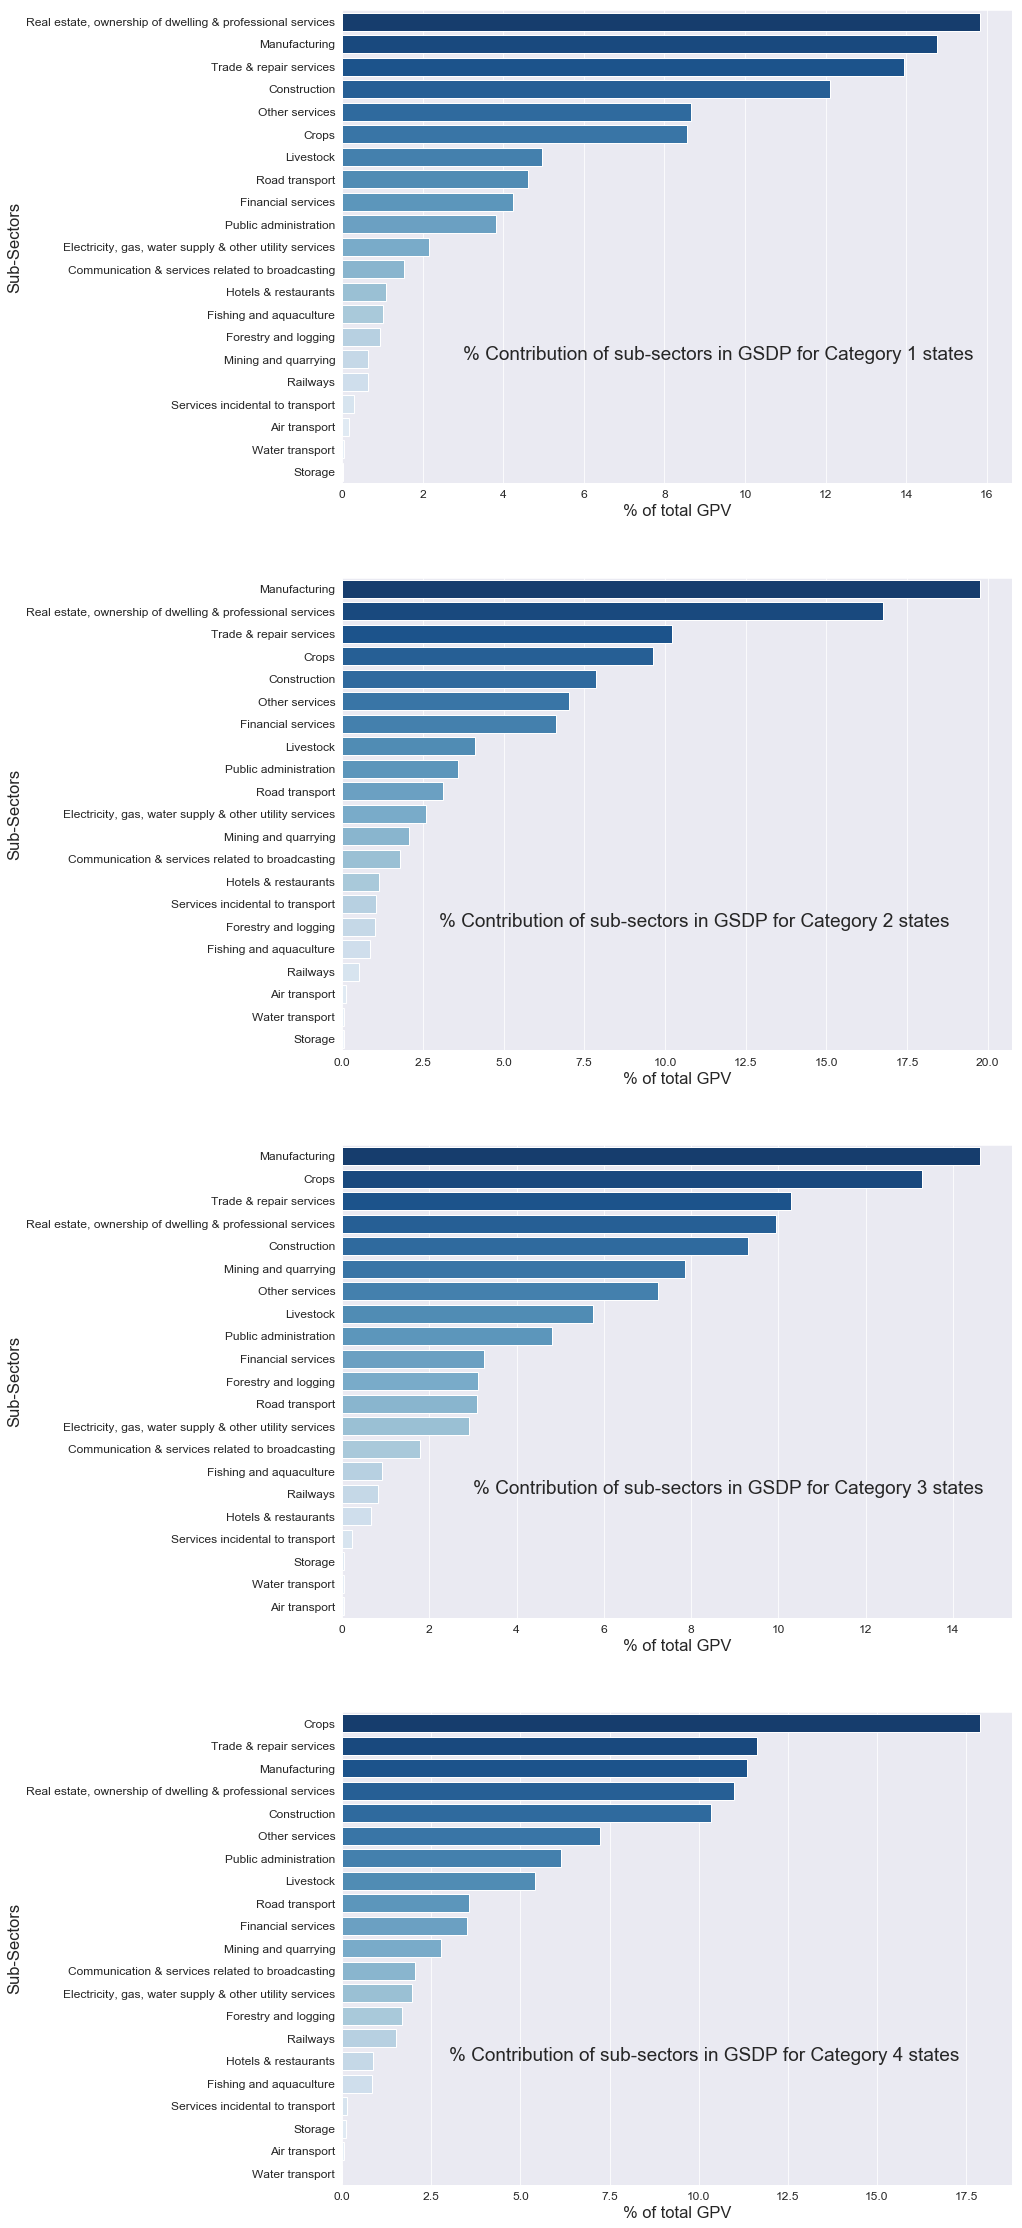

In [53]:

plt.figure(figsize=(12,40))

plt.subplot(4,1,1)
sns.barplot(y=category[1].index,x=round(category[1].loc[:,'% of total GPV'],2),palette='Blues_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Sub-Sectors',fontsize=16.5)
plt.xlabel('% of total GPV',fontsize=16.5)
plt.text(x=3,y=15,s='% Contribution of sub-sectors in GSDP for Category 1 states',fontsize=19)

plt.subplot(4,1,2)
sns.barplot(y=category[2].index,x=round(category[2].loc[:,'% of total GPV'],2),palette='Blues_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Sub-Sectors',fontsize=16.5)
plt.xlabel('% of total GPV',fontsize=16.5)
plt.text(x=3,y=15,s='% Contribution of sub-sectors in GSDP for Category 2 states',fontsize=19)


plt.subplot(4,1,3)
sns.barplot(y=category[3].index,x=round(category[3].loc[:,'% of total GPV'],2),palette='Blues_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Sub-Sectors',fontsize=16.5)
plt.xlabel('% of total GPV',fontsize=16.5)
plt.text(x=3,y=15,s='% Contribution of sub-sectors in GSDP for Category 3 states',fontsize=19)


plt.subplot(4,1,4)
sns.barplot(y=category[4].index,x=round(category[4].loc[:,'% of total GPV'],2),palette='Blues_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Sub-Sectors',fontsize=16.5)
plt.xlabel('% of total GPV',fontsize=16.5)
plt.text(x=3,y=15,s='% Contribution of sub-sectors in GSDP for Category 4 states',fontsize=19)

### Insights From plot :

###### a. In all four categories, sub-sectors :
-  Storage
-  Water Transport
-  Air Transport
-  Services incidental to transport
 are doing really bad and need of continuously focus.

###### b. In all categories sub-sectors:
-  Real estate, ownership of dwelling & professional services
-  Crops
-  Manufacturing
-  Trade And Repair Services
-  Construction

are doing really well.

###### c. From Category 1 to Category 4, It is clear that % contribution of **CROPS** is increasing and in category 4 it stands for most contribution to GDP.

###### d. Where as contribution for tertiary sub-sectors like Estate, ownership, Trade and services are decline as move from category 1 to category 2.

###### e. Among the transport services, Road Transport has the maximum % contribution.

###### f. In case of Secondary sectors, Minning and quarrying contribute much less than the other sub-sectors of secondary sector in all categories.

###### g. Forestry and logging is much popular in category 3 than other categories.


## Part-II: GDP and Education Drop-out Rates:

### In this part of the analysis, we will investigate whether there is any relationship between per capita GDP with drop-out rates in education.

In [54]:
# Read data into python...
dp_rate=pd.read_csv('Drop out rate state wise.csv')
dp_rate.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [55]:
# Columns of recieved dataframe...
dp_rate.columns

Index(['Sl. No.', 'Level of Education - State', 'Primary - 2012-2013',
       'Primary - 2014-2015', 'Primary - 2014-2015.1',
       'Upper Primary - 2012-2013', 'Upper Primary - 2013-2014',
       'Upper Primary - 2014-2015', 'Secondary - 2012-2013',
       'Secondary - 2013-2014', 'Secondary - 2014-2015',
       'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014',
       'Senior Secondary - 2014-2015'],
      dtype='object')

## Note: All the analyze is done for the year 2014-15 for the states.

### Data Preparation :

In [56]:
# Drop Out of columns not required...
dp_rate=dp_rate.loc[:,['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']]

# look at the required table
dp_rate.head()

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
0,A & N Islands,1.21,1.69,9.87,16.93
1,Andhra Pradesh,4.35,5.20,15.71,NaN
2,Arunachal Pradesh,10.89,6.71,17.11,18.42
3,Assam,7.44,10.51,27.06,NaN
4,Bihar,2.09,4.08,25.90,NaN


In [57]:
# Renaming of the columns for better understanding...
dp_rate.columns=['State','Primary','Upper Primary','Secondary','Senior Secondary']
dp_rate.head()

,State,Primary,Upper Primary,Secondary,Senior Secondary
0,A & N Islands,1.21,1.69,9.87,16.93
1,Andhra Pradesh,4.35,5.20,15.71,NaN
2,Arunachal Pradesh,10.89,6.71,17.11,18.42
3,Assam,7.44,10.51,27.06,NaN
4,Bihar,2.09,4.08,25.90,NaN


In [58]:
# Take a look on whole table for any disperancy in data...
dp_rate

,State,Primary,Upper Primary,Secondary,Senior Secondary
0,A & N Islands,1.21,1.69,9.870,16.93
1,Andhra Pradesh,4.35,5.20,15.710,NaN
2,Arunachal Pradesh,10.89,6.71,17.110,18.42
3,Assam,7.44,10.51,27.060,NaN
4,Bihar,2.09,4.08,25.900,NaN
5,Chandigarh,NaN,0.44,NaN,10.55
6,Chhatisgarh,1.42,5.85,21.260,2.76
7,Dadra & Nagar Haveli,1.57,4.02,16.770,9.47
8,Daman & Diu,0.85,3.11,32.270,40.48
9,Delhi,NaN,0.76,11.810,17.32


#### From above insight, it is observed:
-  Spelling mistake for some of the states including 'Chhattisgarh' & 'Uttarakhand'
-  There is lot NaN values for various drop outs categories in various states

In [59]:
# Correction of spelling mistake in states name...
dp_rate.loc[dp_rate.State=='Chhatisgarh','State']='Chhattisgarh'
dp_rate.loc[dp_rate.State=='Uttrakhand','State']='Uttarakhand'

# Drop out the states having NaN values in it...
dp_rate=dp_rate.loc[~(dp_rate.isnull().any(axis=1)),:]

# Rechecking of the dataset:-
dp_rate

,State,Primary,Upper Primary,Secondary,Senior Secondary
0,A & N Islands,1.21,1.69,9.87,16.93
2,Arunachal Pradesh,10.89,6.71,17.11,18.42
6,Chhattisgarh,1.42,5.85,21.26,2.76
7,Dadra & Nagar Haveli,1.57,4.02,16.77,9.47
8,Daman & Diu,0.85,3.11,32.27,40.48
10,Goa,0.20,0.07,11.15,13.91
11,Gujarat,0.76,6.41,25.04,7.04
12,Haryana,0.41,5.81,15.89,5.75
13,Himachal Pradesh,0.46,0.87,6.07,7.41
14,Jammu and Kashmir,5.46,5.44,17.28,12.65


In [60]:
# Resetting of the index... 
dp_rate.set_index('State',inplace=True)

In [61]:
# Drop down the states whose GDP per capita values are not available...
dp_rate.drop(['A & N Islands','Dadra & Nagar Haveli','Daman & Diu','Jammu and Kashmir','West Bengal'],axis=0,inplace=True)
dp_rate

C:\Users\rd\Upgrad\Python\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Primary,Upper Primary,Secondary,Senior Secondary
State,,,,
Arunachal Pradesh,10.89,6.71,17.11,18.42
Chhattisgarh,1.42,5.85,21.26,2.76
Goa,0.20,0.07,11.15,13.91
Gujarat,0.76,6.41,25.04,7.04
Haryana,0.41,5.81,15.89,5.75
Himachal Pradesh,0.46,0.87,6.07,7.41
Jharkhand,6.41,8.99,24.00,3.41
Karnataka,2.32,3.85,26.18,1.96
Maharashtra,0.55,1.79,12.87,1.83


In [62]:
# GDP per capita is taken from gsdp data frame...
gsdp.head()

,State,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Category
0,Goa,312129,1547536,1738217,3597882,527279,61854,4063307,14950,271793,C1
1,Sikkim,138776,845253,483103,1467133,72200,18400,1520933,6330,240274,C1
2,Haryana,8040424,12561411,19226568,39828404,4985670,1067867,43746207,266620,164077,C1
3,Kerala,6489442,12070040,29673778,48233259,5189352,822381,52600230,339843,154778,C1
4,Uttarakhand,1845972,7642865,5587975,15076812,1434856,313139,16198529,105820,153076,C2


In [63]:
# Addition of column to the dataset containting GDP per Capita for states...

# Empty list
GDP_per_Capita=[]

for i in dp_rate.index:
    if i in list(gsdp.State):
        GDP_per_Capita.append(int(gsdp.loc[gsdp.State==i,'Per Capita GSDP (Rs.)']))
    else:
        GDP_per_Capita.append(None)

dp_rate['GDP_per_Capita']=GDP_per_Capita

# Checking of the data frame formed...
dp_rate

C:\Users\rd\Upgrad\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Primary,Upper Primary,Secondary,Senior Secondary,GDP_per_Capita
State,,,,,
Arunachal Pradesh,10.89,6.71,17.11,18.42,112718.0
Chhattisgarh,1.42,5.85,21.26,2.76,86860.0
Goa,0.20,0.07,11.15,13.91,271793.0
Gujarat,0.76,6.41,25.04,7.04,141263.0
Haryana,0.41,5.81,15.89,5.75,164077.0
Himachal Pradesh,0.46,0.87,6.07,7.41,147330.0
Jharkhand,6.41,8.99,24.00,3.41,62091.0
Karnataka,2.32,3.85,26.18,1.96,145141.0
Maharashtra,0.55,1.79,12.87,1.83,152853.0


##### GDP per capita value for Puducherry is included in gsdp data, So to include it is taken from dataset 'Puducherry.csv'

In [64]:
# Reading data into python`
Puducherry=pd.read_csv('Puducherry.csv')
Puducherry.head()

,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,1,"Agriculture, forestry and fishing",75378,90421,97627,113156,129392,146798
1,1.1,Crops,20453,30492,32407,38878,46166,53913
2,1.2,Livestock,32214,36707,39975,45358,51880,57027
3,1.3,Forestry and logging,3319,3388,3331,3931,4423,4854
4,1.4,Fishing and aquaculture,19392,19834,21914,24989,26923,31004


In [65]:
# Addition of value for the GDP per Capita for the state Puducherry... 
dp_rate.loc['Puducherry','GDP_per_Capita']=int(Puducherry.loc[Puducherry.Item=='Per Capita GSDP (Rs.)','2014-15'])

# Take a look upon complete table...
dp_rate

C:\Users\rd\Upgrad\Python\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rd\Upgrad\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Primary,Upper Primary,Secondary,Senior Secondary,GDP_per_Capita
State,,,,,
Arunachal Pradesh,10.89,6.71,17.11,18.42,112718.0
Chhattisgarh,1.42,5.85,21.26,2.76,86860.0
Goa,0.20,0.07,11.15,13.91,271793.0
Gujarat,0.76,6.41,25.04,7.04,141263.0
Haryana,0.41,5.81,15.89,5.75,164077.0
Himachal Pradesh,0.46,0.87,6.07,7.41,147330.0
Jharkhand,6.41,8.99,24.00,3.41,62091.0
Karnataka,2.32,3.85,26.18,1.96,145141.0
Maharashtra,0.55,1.79,12.87,1.83,152853.0


## Plot to analyze the correlation of GDP per capita with dropout rates in education :

Text(8, 200000, 'GDP per Capita Vs Senior Secondary Drop Out')

<Figure size 432x288 with 0 Axes>

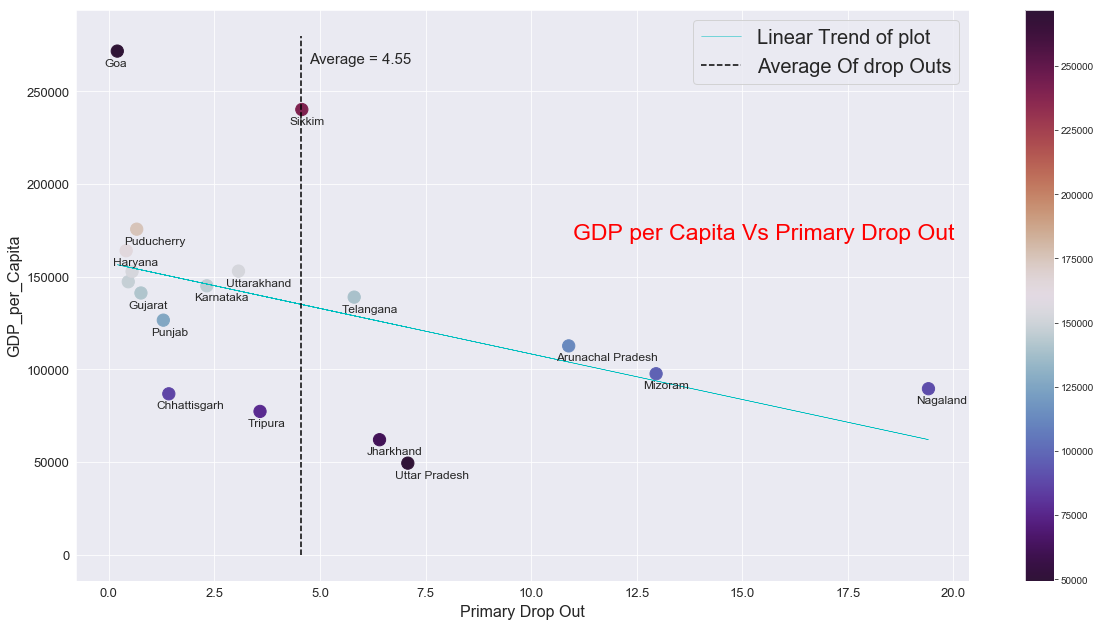

<Figure size 432x288 with 0 Axes>

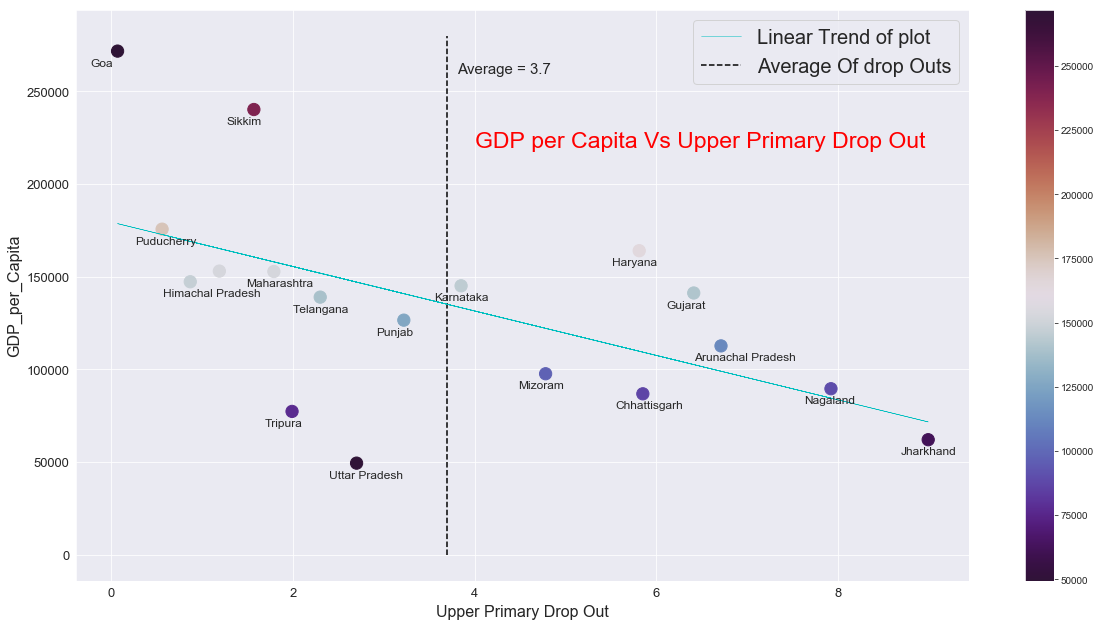

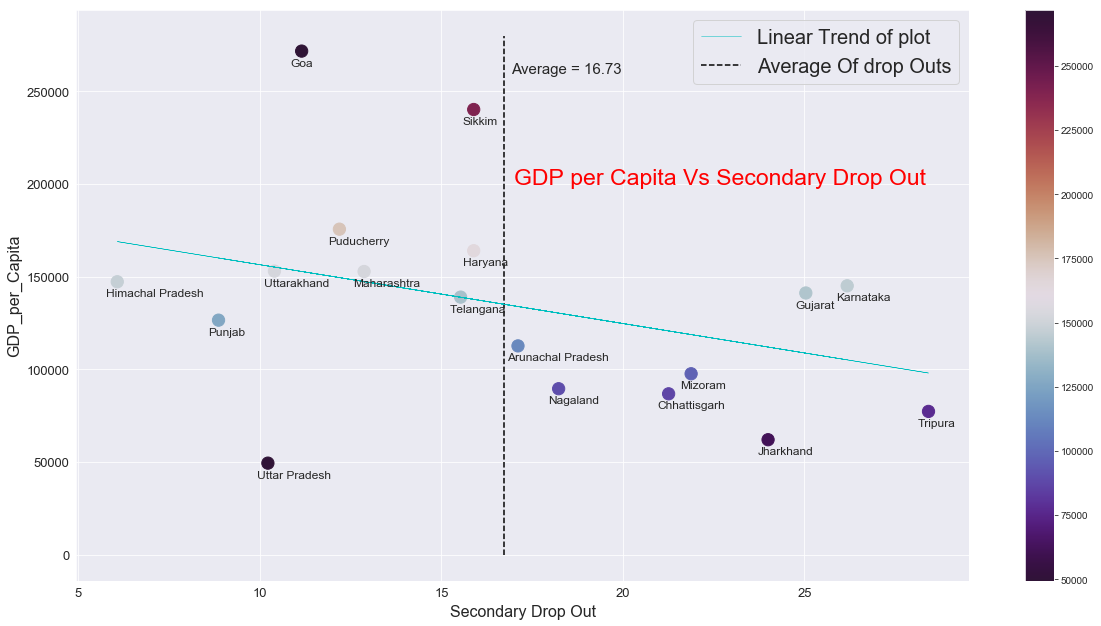

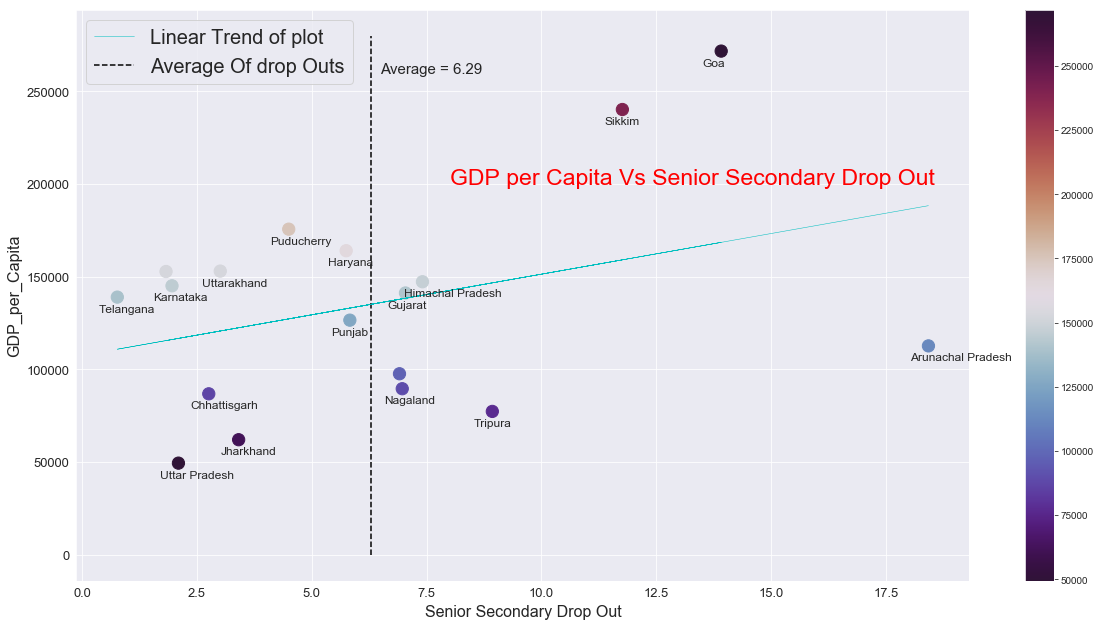

In [80]:
# For Primary Drop out...

plt.figure(0)   
plt.figure(figsize=(20,10.5))   # Adjusting graph size

a=dp_rate.Primary
b=dp_rate.GDP_per_Capita   

index=dp_rate.index

plt.scatter(a,b,c=b,s=150,cmap='twilight_shifted')      # Plot a graph 
plt.colorbar()                                          # Represent the color varient with value

labels=np.array(index)                                  # Add labels as name of State
labels[[5,8]]=None 
for i,txt in enumerate(list(labels)):
    plt.text(x=list(a)[i]-0.3,y=list(b)[i]-8000,s=txt,size=12)


z=np.polyfit(a,b,1)                                     # Add a trend line of graph
p=np.poly1d(z)
trend_line, =plt.plot(a,p(a),'c-',lw=0.5,label='Linear Trend of plot')
    
    
a_mean=round(a.mean(),2) # Add a average line

average_line, =plt.plot([a_mean,a_mean],[0,280000],'--k',lw=1.5,label='Average Of drop Outs')
plt.text(y=265000,x=a_mean+0.2,s='Average = {}'.format(a_mean),size=15)

plt.legend(handles=[trend_line,average_line],fontsize=20) # Show a legend of diiferent lines in graph

plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Primary Drop Out',fontsize=16)
plt.ylabel('GDP_per_Capita',fontsize=16)
plt.text(x=11,y=170000,s='GDP per Capita Vs Primary Drop Out',size=23,color='r')







# For Upper Primary Drop... 
plt.figure(2)
plt.figure(figsize=(20,10.5))
 
a=dp_rate['Upper Primary']

plt.scatter(a,b,c=b,s=150,cmap='twilight_shifted')
plt.colorbar()

labels=np.array(index)
labels[17]=None
for i,txt in enumerate(list(labels)):
    plt.text(x=list(a)[i]-0.3,y=list(b)[i]-8000,s=txt,size=12)

a_mean=round(a.mean(),2)
average_line, =plt.plot([a_mean,a_mean],[0,280000],'--k',lw=1.5,label='Average Of drop Outs')
plt.text(x=a_mean+0.1,y=260000,s='Average = {}'.format(a_mean),size=15)

z=np.polyfit(a,b,1)
p=np.poly1d(z)
trend_line, =plt.plot(a,p(a),'c-',lw=0.5,label='Linear Trend of plot')

plt.legend(handles=[trend_line,average_line],fontsize=20)

plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('GDP_per_Capita',fontsize=16)
plt.xlabel('Upper Primary Drop Out',fontsize=16)
plt.text(y=220000,x=4,s='GDP per Capita Vs Upper Primary Drop Out',size=23,color='r')





#For Secondary Drop Out...
plt.figure(3)
plt.figure(figsize=(20,10.5))
 
a=dp_rate.Secondary

plt.scatter(a,b,c=b,s=150,cmap='twilight_shifted')
plt.colorbar()

labels=np.array(index)

for i,txt in enumerate(list(labels)):
    plt.text(x=list(a)[i]-0.3,y=list(b)[i]-8000,s=txt,size=12)

a_mean=round(a.mean(),2)
average_line, =plt.plot([a_mean,a_mean],[0,280000],'--k',lw=1.5,label='Average Of drop Outs')
plt.text(y=260000,x=a_mean+0.2,s='Average = {}'.format(a_mean),size=15)

z=np.polyfit(a,b,1)
p=np.poly1d(z)
trend_line, =plt.plot(a,p(a),'c-',lw=0.5,label='Linear Trend of plot')

plt.legend(handles=[trend_line,average_line],fontsize=20)

plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('GDP_per_Capita',fontsize=16)
plt.xlabel('Secondary Drop Out',fontsize=16)
plt.text(y=200000,x=17,s='GDP per Capita Vs Secondary Drop Out',size=23,color='r')





# For Senior Secondary drop out...
plt.figure(4)
plt.figure(figsize=(20,10.5))
 
a=dp_rate['Senior Secondary']

plt.scatter(a,b,c=b,s=150,cmap='twilight_shifted')
plt.colorbar()

labels=np.array(index)
labels[[8,9]]=None
for i,txt in enumerate(list(labels)):
    plt.text(x=list(a)[i]-0.4,y=list(b)[i]-8000,s=txt,size=12)

a_mean=round(a.mean(),2)
average_line, =plt.plot([a_mean,a_mean],[0,280000],'--k',lw=1.5,label='Average Of drop Outs')
plt.text(y=260000,x=a_mean+0.2,s='Average = {}'.format(a_mean),size=15)

z=np.polyfit(a,b,1)
p=np.poly1d(z)
trend_line, =plt.plot(a,p(a),'c-',lw=0.5,label='Linear Trend of plot')

plt.legend(handles=[trend_line,average_line],fontsize=20)

plt.xticks(size=13)
plt.yticks(size=13)
plt.ylabel('GDP_per_Capita',fontsize=16)
plt.xlabel('Senior Secondary Drop Out',fontsize=16)
plt.text(y=200000,x=8,s='GDP per Capita Vs Senior Secondary Drop Out',size=23,color='r')




### Insights from the plot :
GDP per Capita is decreases with increasing Drop out but in case of Senior Secondary education, GDP per Capita of is increasing with drop out.
Decrease in GDP per Capita is decreasing as we move on from lower education to higher education drop outs.

### Hypothesis :

A student who drop out in there early stages of education (For eg. Primary, Upper Primary) had not learn or achieved the position of self development (They need someone to nurture them and gets the best from them) consequently not able to successful in there ambition and contribute to there state GDP. 
whereas in case drop outs at higher level of education (Senior Secondary), Students are be in the position of self capable and the probably the universities don't capable of doing same or provide the culture, quantity of knowledge students wants.
